In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('/Users/tanaya/USC')

from sedproxy.clim_to_proxy_clim import clim_to_proxy_clim

from plot_pfms import plot_pfms
from bioturbation_weights import bioturbation_weights
from proxy_conversion import proxy_conversion

In [3]:
N41_t21k_climate_df = pd.read_csv('./data/N41_t21k_climate.csv')


In [4]:
N41_t21k_climate_df

,1,2,3,4,5,6,7,8,9,10,11,12
0,297.856750,297.387848,298.060211,299.224487,299.676086,300.216705,300.548340,299.918243,299.640045,299.638641,299.930145,299.338135
1,297.988586,297.534149,297.826263,299.008301,299.715118,299.674255,300.160858,300.668549,299.781891,299.849670,299.782349,298.969879
2,297.842682,297.746643,298.359863,299.145874,299.605621,300.091339,300.150024,300.142303,299.542664,299.598511,299.810516,298.917236
3,297.696075,297.665863,298.492065,299.513672,300.019958,299.897125,300.443237,299.980255,299.697266,300.064819,299.736328,298.990692
4,297.769073,297.343628,297.945160,299.174103,299.993988,299.824371,300.144409,300.397797,299.949646,300.160980,299.815002,298.963501
...,...,...,...,...,...,...,...,...,...,...,...,...
22035,300.398376,300.016052,300.339905,301.255066,302.072510,302.331451,302.629669,303.113129,303.415253,302.645966,302.094177,301.097687
22036,300.493683,300.159546,300.706055,301.621887,301.892212,302.567261,303.199188,303.063538,302.977295,302.493683,302.467407,301.545135
22037,300.827179,300.371948,300.632568,301.689270,302.252899,302.446503,302.751526,303.307953,303.143921,302.994904,302.401093,301.192169
22038,300.169983,300.050964,300.660126,301.637085,302.315247,302.356537,302.730042,303.244904,302.580048,302.639038,302.660583,301.425751


In [5]:
clim_in = N41_t21k_climate_df - 273.15
rows = clim_in.shape[0]
time = np.arange(-39, -39+rows)
clim_in.index = time


In [6]:
np.shape(clim_in)

(22040, 12)

In [7]:
req_timepoints = np.arange(1,20000,100) # time points for which we want to model a proxy value 

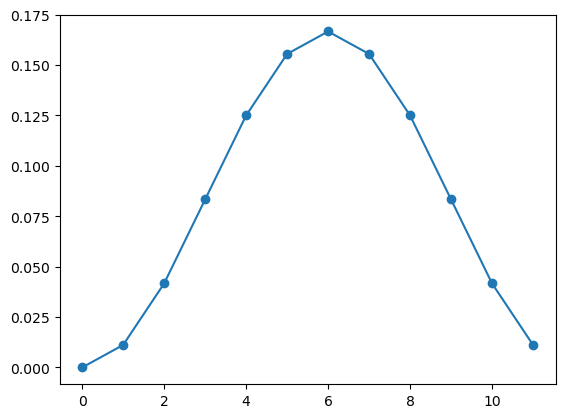

In [8]:
hab_weights = 1 + np.cos(np.linspace(np.pi, 3*np.pi-2*np.pi/12,12))
hab_weights = hab_weights/np.sum(hab_weights)

plt.plot(hab_weights, marker='o')

In [9]:
# Load stages key
stages_key_df = pd.read_csv("./data/stages_key.csv")

# Normalize columns and stage names
stages_key_df.columns = [c.replace(".", "_") for c in stages_key_df.columns]
stages_key_df["stage"] = stages_key_df["stage"].str.replace(".", "_", regex=False)



In [10]:
# running the proxy forward model

PFM = clim_to_proxy_clim(clim_signal=clim_in,
                         timepoints=req_timepoints,
                         habitat_weights=hab_weights,
                         sed_acc_rate=50,
                         sigma_meas=0.25,
                         sigma_ind=1,
                         plot_sig_res=1,
                         stages_key=stages_key_df)

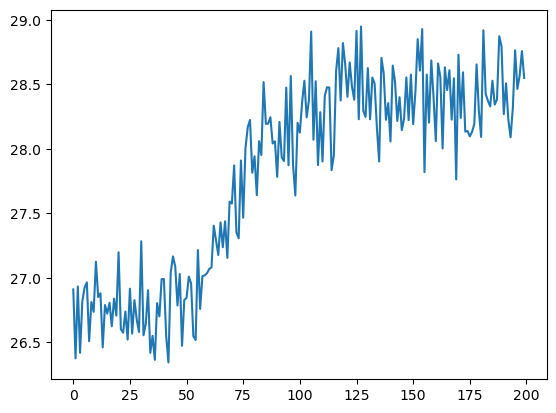

<Axes: >

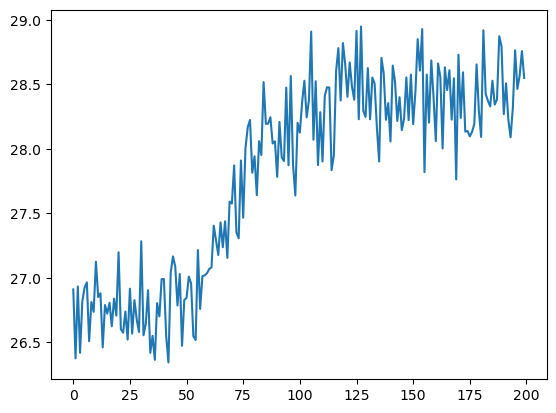

In [11]:
PFM['simulated_proxy']['reconstructed_climate'].plot()
plt.show()
PFM['simulated_proxy']['simulated_proxy'].plot()

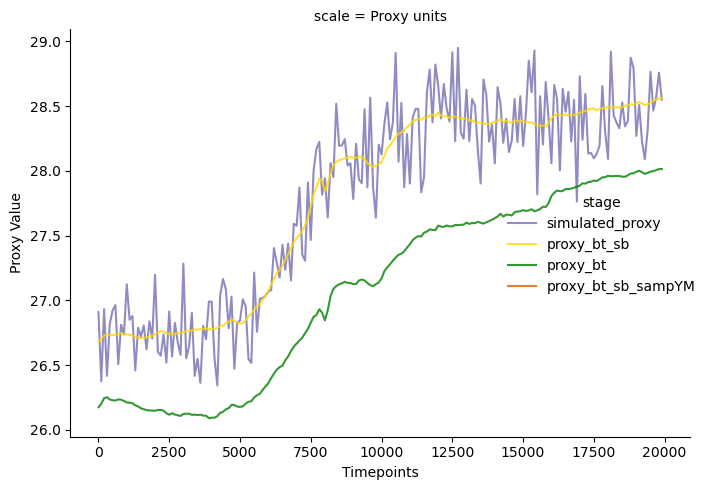

In [12]:
plot_pfms(PFM, stages_key=stages_key_df)